In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
df.shape

(29451, 12)

In [5]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [6]:
df.duplicated().sum()

401

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(29050, 12)

In [9]:
df.columns = [col.lower() for col in df.columns]

In [10]:
df.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,target(price_in_lacs)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [11]:
df['posted_by'].value_counts()

posted_by
Dealer     17961
Owner      10470
Builder      619
Name: count, dtype: int64

In [12]:
df['bhk_or_rk'].value_counts()

bhk_or_rk
BHK    29026
RK        24
Name: count, dtype: int64

In [13]:
df.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,target(price_in_lacs)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [14]:
df['address'] = df['address'].str.split(',').str.get(1)

In [15]:
df.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,target(price_in_lacs)
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5


In [16]:
city_counts = df['address'].value_counts()
df = df[df['address'].isin(city_counts[city_counts > 50].index)]

In [17]:
df.shape

(26858, 12)

In [18]:
df.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,target(price_in_lacs)
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,Kochi,10.033280,76.282571,42.0


In [19]:
df.describe()

,under_construction,rera,bhk_no.,square_ft,ready_to_move,resale,longitude,latitude,target(price_in_lacs)
count,26858.000000,26858.000000,26858.000000,2.685800e+04,26858.000000,26858.000000,26858.000000,26858.000000,26858.000000
mean,0.185196,0.332489,2.403232,2.153013e+04,0.814804,0.928290,21.288040,76.848601,149.724038
std,0.388464,0.471114,0.863318,1.990990e+06,0.388464,0.258013,6.162686,10.342735,675.264445
min,0.000000,0.000000,1.000000,3.985594e+00,0.000000,0.000000,-37.713008,-117.001699,0.250000
25%,0.000000,0.000000,2.000000,9.002521e+02,1.000000,1.000000,18.490075,73.781944,40.000000
50%,0.000000,0.000000,2.000000,1.182033e+03,1.000000,1.000000,20.264440,77.335746,65.000000
75%,0.000000,1.000000,3.000000,1.567222e+03,1.000000,1.000000,26.900926,77.761394,110.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,144.957843,30000.000000


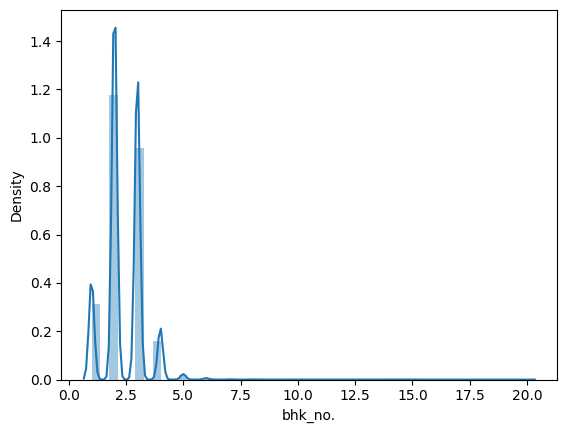

In [20]:
sns.distplot(df['bhk_no.'])
plt.show()

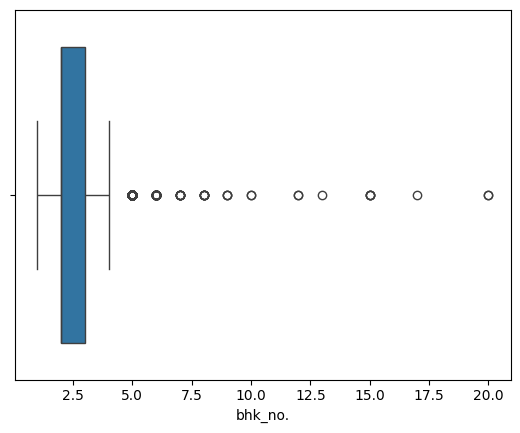

In [21]:
sns.boxplot(x= 'bhk_no.',data=df)
plt.show()

In [22]:
q1 = df['bhk_no.'].quantile(0.25)
q3 = df['bhk_no.'].quantile(0.75)

In [23]:
IQR = q3-q1

In [24]:
min_range = q1 - 1.5*IQR
max_range = q3 + 1.5*IQR
min_range,max_range

(0.5, 4.5)

In [25]:
df = df[df['bhk_no.'] < max_range]

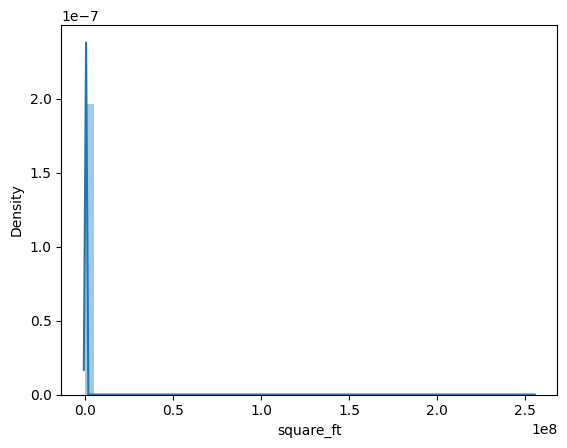

In [26]:
sns.distplot(df['square_ft'])
plt.show()

In [27]:
q1 = df['square_ft'].quantile(0.25)
q3 = df['square_ft'].quantile(0.75)
IQR = q3-q1
min_range = q1 - 1.5*IQR
max_range = q3 + 1.5*IQR
min_range,max_range

(-75.35637299999985, 2525.833979)

In [28]:
df = df[df['square_ft'] < max_range]

In [29]:
df.describe()

,under_construction,rera,bhk_no.,square_ft,ready_to_move,resale,longitude,latitude,target(price_in_lacs)
count,25263.000000,25263.000000,25263.000000,25263.000000,25263.000000,25263.000000,25263.000000,25263.000000,25263.000000
mean,0.186003,0.330127,2.308356,1196.559968,0.813997,0.932708,21.290689,76.855386,88.352120
std,0.389117,0.470268,0.724169,450.986655,0.389117,0.250532,6.135161,10.446910,106.160261
min,0.000000,0.000000,1.000000,3.985594,0.000000,0.000000,-37.713008,-117.001699,0.250000
25%,0.000000,0.000000,2.000000,885.083236,1.000000,1.000000,18.496670,73.775880,39.000000
50%,0.000000,0.000000,2.000000,1150.026137,1.000000,1.000000,20.264440,77.338956,62.000000
75%,0.000000,1.000000,3.000000,1478.160184,1.000000,1.000000,26.886881,77.786000,100.000000
max,1.000000,1.000000,4.000000,2525.743151,1.000000,1.000000,59.912884,144.957843,4200.000000


In [30]:
df.head()

,posted_by,under_construction,rera,bhk_no.,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,target(price_in_lacs)
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,Kochi,10.033280,76.282571,42.0


In [31]:
X = df.iloc[:,:-1]

In [32]:
Y = df['target(price_in_lacs)']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [34]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor

In [35]:
trf1 = ColumnTransformer([
 ('One', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first', categories='auto'), [0,4,8])
], remainder='passthrough')

In [36]:
trf2 = StandardScaler()

In [37]:
trf3 = DecisionTreeRegressor()

In [38]:
pipe = make_pipeline(trf1,trf2,trf3)

In [39]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 4, 8])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [40]:
print(pipe.score(x_train,y_train))
print(pipe.score(x_test,y_test))

0.9992008507893954
0.5282404501436044


In [41]:
y_pred = pipe.predict(x_test)

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_test,y_pred)

0.5282404501436044

In [44]:
df.iloc[0]

posted_by                      Owner
under_construction                 0
rera                               0
bhk_no.                            2
bhk_or_rk                        BHK
square_ft                1300.236407
ready_to_move                      1
resale                             1
address                    Bangalore
longitude                   12.96991
latitude                    77.59796
target(price_in_lacs)           55.0
Name: 0, dtype: object

In [45]:
X.iloc[0].values 

array(['Owner', 0, 0, 2, 'BHK', 1300.236407, 1, 1, 'Bangalore', 12.96991,
       77.59796], dtype=object)

In [46]:
input_data = X.iloc[0]

In [47]:
data = np.asarray(input_data).reshape(1,-1)

In [48]:
pipe.predict(data)[0]

55.0

In [49]:
import pickle

In [50]:
with open('clean_data.pkl', 'wb') as f:
    pickle.dump(X, f)

In [51]:
with open('model.pkl', 'wb') as f:
    pickle.dump(pipe, f)